In [1]:
# https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
# performing linear algebra
import numpy as np
# data processing
import pandas as pd
# visualisation
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/cancer.csv")

In [3]:
# no need to use (), cuz shape is a method
data.shape

(569, 33)

In [4]:
# needs to use (), since desc is an attribute
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
# data.shape[0] * data.shape[1]
data.size

18777

In [8]:
# We are dropping columns – ‘id’ and ‘Unnamed: 32’ as they have no role in prediction
data = data.drop(['Unnamed: 32', 'id'], axis = 1)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

In [9]:
data = data.astype(np.float16)

In [ ]:
# Input and Output data
y = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis = 1)

In [11]:
# Normalisation
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values

In [12]:
# Splitting data for training and testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
	x, y, test_size = 0.15, random_state = 42)

X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ", X_train.shape)
print("x test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (30, 483)
x test:  (30, 86)
y train:  (483,)
y test:  (86,)


In [13]:
# Weight and bias initializing
def initialize_weights_and_bias(dimension):
	w = np.full((dimension, 1), 0.01)
	b = 0.0
	return w, b

In [14]:
# Sigmoid Function – calculating z value.
def sigmoid(z):
	y_head = 1/(1 + np.exp(-z))
	return y_head

In [15]:
# Forward-Backward Propagation (traninig process)
def forward_backward_propagation(w, b, X_train, y_train):
	z = np.dot(w.T, X_train) + b
	y_head = sigmoid(z)
	loss = - y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
	# X_train.shape[1] is for scaling
	cost = (np.sum(loss)) / X_train.shape[1]	

	# backward propagation
	derivative_weight = (np.dot(X_train, (
		(y_head - y_train).T))) / X_train.shape[1]
	derivative_bias = np.sum(
		y_head-y_train) / X_train.shape[1]				
	gradients = {"derivative_weight": derivative_weight,
				"derivative_bias": derivative_bias}
	return cost, gradients

In [16]:
# Updating Parameters
def update(w, b, X_train, y_train, learning_rate, number_of_iterarion):
	cost_list = []
	cost_list2 = []
	index = []

	# updating(learning) parameters is number_of_iterarion times
	for i in range(number_of_iterarion):
		# make forward and backward propagation and find cost and gradients
		cost, gradients = forward_backward_propagation(w, b, X_train, y_train)
		cost_list.append(cost)

		# lets update
		w = w - learning_rate * gradients["derivative_weight"]
		b = b - learning_rate * gradients["derivative_bias"]
		if i % 10 == 0:
			cost_list2.append(cost)
			index.append(i)
			print ("Cost after iteration % i: % f" %(i, cost))

	# update(learn) parameters weights and bias
	parameters = {"weight": w, "bias": b}
	plt.plot(index, cost_list2)
	plt.xticks(index, rotation ='vertical')
	plt.xlabel("Number of Iterarion")
	plt.ylabel("Cost")
	plt.show()
	return parameters, gradients, cost_list

In [17]:
# Predictions
def predict(w, b, X_test):
	# X_test is a input for forward propagation
	z = sigmoid(np.dot(w.T, X_test)+b)
	Y_prediction = np.zeros((1, X_test.shape[1]))

	# if z is bigger than 0.5, our prediction is sign one (y_head = 1),
	# if z is smaller than 0.5, our prediction is sign zero (y_head = 0),
	for i in range(z.shape[1]):
		if z[0, i]<= 0.5:
			Y_prediction[0, i] = 0
		else:
			Y_prediction[0, i] = 1

	return Y_prediction

Cost after iteration  0:  0.692836
Cost after iteration  10:  0.498566
Cost after iteration  20:  0.404981
Cost after iteration  30:  0.350043
Cost after iteration  40:  0.313729
Cost after iteration  50:  0.287747
Cost after iteration  60:  0.268094
Cost after iteration  70:  0.252606
Cost after iteration  80:  0.240013
Cost after iteration  90:  0.229520


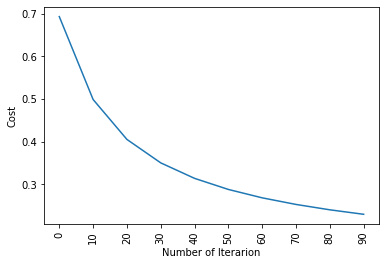

train accuracy: 94.40993788819875 %
test accuracy: 94.18604651162791 %


In [18]:
# Logistic Regression
def logistic_regression(X_train, y_train, X_test, y_test,
						learning_rate, num_iterations):

	dimension = X_train.shape[0]
	w, b = initialize_weights_and_bias(dimension)
	
	parameters, gradients, cost_list = update(
		w, b, X_train, y_train, learning_rate, num_iterations)
	
	y_prediction_test = predict(
		parameters["weight"], parameters["bias"], X_test)
	y_prediction_train = predict(
		parameters["weight"], parameters["bias"], X_train)

	# train / test Errors
	print("train accuracy: {} %".format(
      100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
	print("test accuracy: {} %".format(
      100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
	
logistic_regression(X_train, y_train, X_test,
					y_test, learning_rate = 1, num_iterations = 100)

In [19]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42, max_iter = 150)
print("test accuracy: {} ".format(
	logreg.fit(X_train.T, y_train.T).score(X_test.T, y_test.T)))
print("train accuracy: {} ".format(
	logreg.fit(X_train.T, y_train.T).score(X_train.T, y_train.T)))

test accuracy: 0.9767441860465116 
train accuracy: 0.968944099378882 
